In [25]:
import json
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(30,8.27)})

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Projects/job_list_with_skills.csv"
df = pd.read_csv(filepath, sep =',')

In [123]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Projects/job_list_with_skills.json"
df = pd.read_json(filepath)

In [ ]:
#df['skills'] = df['skills'].apply(lambda x: json.loads(x))

In [124]:
df.head()

,id,title,company,url,location,date,skills,new_title
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,"[process, code, cloud, app, google, play, mark...",Data Analyst
1,3479541484,Data Scientist H/F,AGYLIS,https://fr.linkedin.com/jobs/view/data-scienti...,"Boulogne-Billancourt, Île-de-France, France",2023-02-11,"[google, python, test, data, client, cloud, sql]",Data Scientist
2,3477087459,Creative Data Analyst - CDD,CHANEL,https://fr.linkedin.com/jobs/view/creative-dat...,"Neuilly-sur-Seine, Île-de-France, France",2023-02-10,"[bi, process, management, creative, production...",Data Analyst
3,3479121451,Chef de projet AMOA Data management (F/H),Médecins du Monde,https://fr.linkedin.com/jobs/view/chef-de-proj...,"St.-Denis, Île-de-France, France",2023-02-11,"[monitoring, management, go, data, sites, prod...",Data Others
4,3473259005,Consultant(e) Data Strategy H/F,DataValue Consulting,https://fr.linkedin.com/jobs/view/consultant-e...,"Montrouge, Île-de-France, France",2023-02-11,"[certification, business, analytics, managemen...",Data Others


In [125]:
df_title = df[['new_title', 'id']].groupby(['new_title']).count()
df_title = df_title.sort_values(by=['id'], ascending=False)
df_title = df_title.reset_index()
df_title = df_title.rename(columns={'id':"Nombre d'offre", 'new_title': 'Offre'})

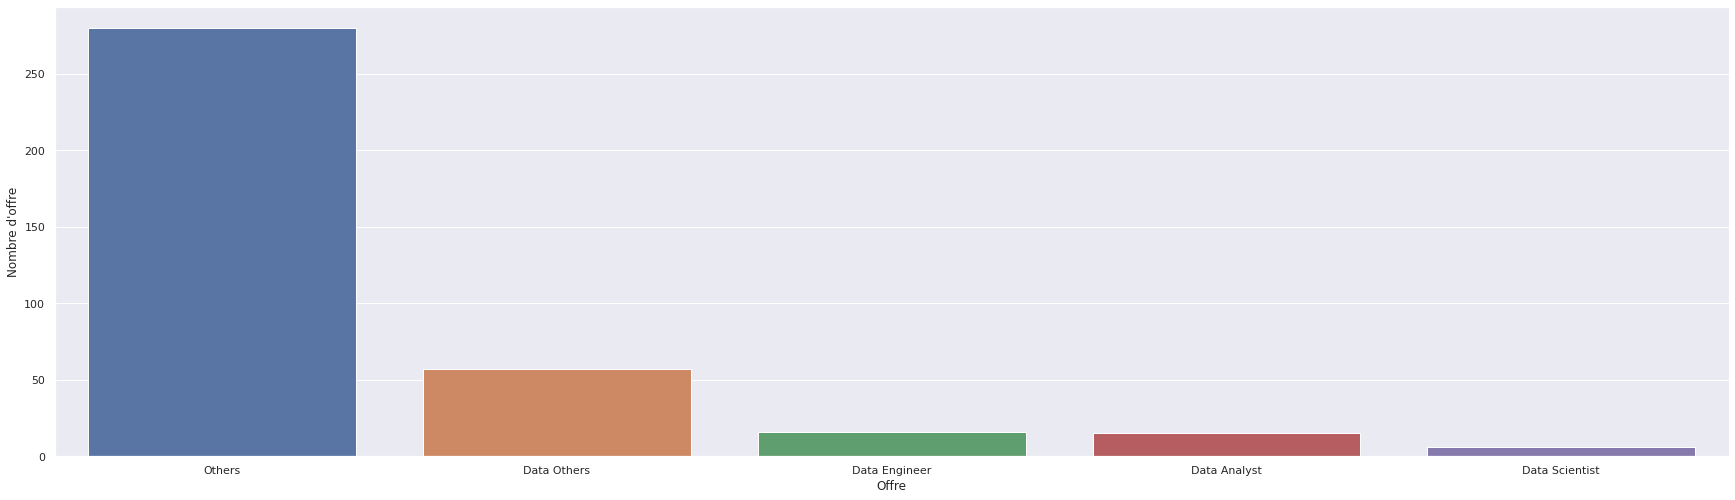

In [126]:
ax = sns.barplot(data=df_title, x='Offre', y="Nombre d'offre",errwidth=0)

In [129]:
df[df['new_title'] == 'Others']['title'].head()

7                          Support - Analyst IT Run H/F
10                               Business Analyst (H/F)
18                                     Business Analyst
20                               Développeur PYTHON H/F
26    Chargé(e) d'Etudes Quantitatives, Département ...
Name: title, dtype: object

In [127]:
df[df['new_title'] == 'Data Others']['title'].head()

3             Chef de projet AMOA Data management (F/H)
4                       Consultant(e) Data Strategy H/F
5               Big Data en Alternance Octobre 2022 H/F
12            Our Data Science internship opportunities
14    Directeur Data Management - Transport & Mobili...
Name: title, dtype: object

In [8]:
df2 = df.explode('skills')
df2.head()

,id,title,company,url,location,date,skills,new_title
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,process,Data Analyst
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,code,Data Analyst
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,cloud,Data Analyst
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,app,Data Analyst
0,3427436026,Data Analyst,Foxintelligence,https://fr.linkedin.com/jobs/view/data-analyst...,"Paris, Île-de-France, France",2023-02-11,google,Data Analyst


In [9]:
df_skills = df2[['skills', 'id']].groupby(['skills']).count()
df_skills = df_skills.sort_values(by=['id'], ascending=False)
df_skills = df_skills.reset_index()
df_skills = df_skills.rename(columns={'id':"Nombre d'offre", 'new_title': 'Offre'})

In [10]:
df_skills.head()

,skills,Nombre d'offre
0,data,366
1,management,188
2,business,175
3,client,130
4,performance,125


In [11]:
df_skills.count()

skills            371
Nombre d'offre    371
dtype: int64

In [75]:
# On ne garde que les compétences qui apparaissent au moinx 5 fois pour réduire le dataframe
df_skills_reduced = df_skills[df_skills["Nombre d'offre"] > 1]
df_skills_reduced.count()

skills            296
Nombre d'offre    296
dtype: int64

In [76]:
skill_list_str = ""
for value in df_skills_reduced['skills']:
    skill_list_str += "'" + value + "',"

print(skill_list_str)

'data','management','business','client','performance','c','process','tech','marketing','manager','cloud','collaboration','production','knowledge','design','development','build','sql','analytics','python','web','software','tools','help','audit','code','documentation','devops','java','status','bi','time','flexible','growth','microsoft','sites','monitoring','privacy','font','aws','systems','stack','security','vue','docker','certification','validation','test','linux','research','guidelines','dynamic','framework','mobile','language','git','google','kubernetes','api','progress','player','e-commerce','angular','system','configuration','saas','presentations','creative','education','spark','react','head','php','community','exploitation','fast','models','metrics','standard','functional','programming','content','alignment','efficiency','utilities','js','free','go','testing','apis','network','form','collection','resources','server','flux','automation','javascript','ansible','interview','rest','sca

In [77]:
black_list = ['c', 'data','plus','clients','nous','missions','solutions','management','place','business','work','france','services','international','service','support','client','performance','expertise','experience','techniques','communication','team','process','technologies','paris','mission','skills','leader','transformation','description','tech','technique','information','marketing','charge','part','manager','english','initiatives','global','forte','collaboration','years','culture','digital','teams','impact','finance','role','production','site','actions','knowledge','esprit','plan','world','strong','ensemble','applications','company','what','inclusion','people','type','sans','working','leadership','great','design','commerce','respect','opportunities','force','architecture','direction','build','technology','product','development','intelligence','durable','lead','solution','ability','orientation','across','recrutement','analytics','innovation','within','develop','application','cabinet','opportunity','based','vision','environment','best','including','programme','employees','unique','oral','engagement','office','minimum','excellent','master','organisation','consultants','project','ensure','software','proposition','plans','engineering','possible','internal','tools','diverse','create','strategy','continue','french','help','well','looking','projects','responsibilities','risk','most','written','challenges','europe','cycle','sales','improve','future','join','participation','customers']
black_list += ['audit', 'code', 'documentation', 'status', 'time', 'flexible', 'growth', 'sites', 'privacy', 'font', 'stack', 'vue']
white_listed = df_skills_reduced['skills'].map(lambda x : x not in black_list)
white_df = df_skills_reduced[white_listed]

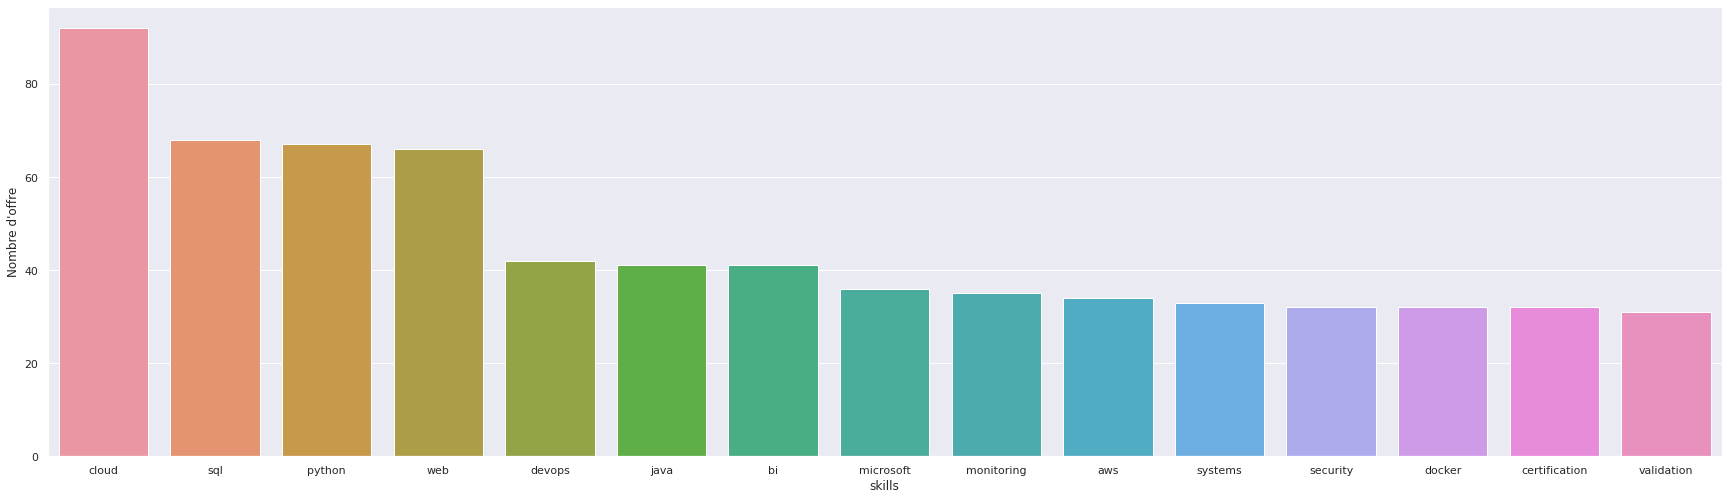

In [78]:
#sns.barplot(data=white_df, x='skills', y="Nombre d'offre").set_yticks(range(int(min(white_df["Nombre d'offre"])), int(max(white_df["Nombre d'offre"])) + 1))
sns.barplot(data=white_df.head(15), x='skills', y="Nombre d'offre")

In [79]:
df_skills2 = df2[['new_title', 'skills', 'id']].groupby(['new_title', 'skills']).count()
df_skills2 = df_skills2.reset_index()
df_skills2 = df_skills2.sort_values(by=['id'], ascending=False)
df_skills2 = df_skills2.rename(columns={'id':"Nombre d'offre", 'new_title': 'Offre'})
#df_skills2 = df_skills2[df_skills2["Nombre d'offre"] > 2]
df_skills2 = df_skills2[df_skills2['skills'].map(lambda x : x not in black_list)]

In [80]:
df_skills2[df_skills2['Offre'] == 'Data Analyst'].head()

,Offre,skills,Nombre d'offre
522,Data Analyst,python,6
527,Data Analyst,sql,6
478,Data Analyst,bi,4
477,Data Analyst,apps,3
502,Data Analyst,google,3


In [29]:
df_skills2[df_skills2['Offre'] == 'Data Scientist'].head()

,Offre,skills,Nombre d'offre
794,Data Scientist,python,5
796,Data Scientist,sql,4
759,Data Scientist,audit,2
788,Data Scientist,pandas,2
775,Data Scientist,git,2


In [30]:
df_skills2[df_skills2['Offre'] == 'Data Engineer'].head()

,Offre,skills,Nombre d'offre
747,Data Engineer,spark,8
744,Data Engineer,python,7
748,Data Engineer,sql,5
726,Data Engineer,hadoop,5
712,Data Engineer,cloud,5


In [31]:
df_skills2[df_skills2['Offre'] == 'Autres'].head()

,Offre,skills,Nombre d'offre
52,Autres,cloud,67
330,Autres,web,52
288,Autres,sql,36
308,Autres,time,35
293,Autres,status,35


In [81]:
df_skills2[(df_skills2['Offre'] == 'Data Autres') & (df_skills2['skills'] == 'dataiku')]

,Offre,skills,Nombre d'offre


In [82]:
def get_jobs_from_title(df, title):
  return df[df['new_title'] == title]

def get_jobs_from_skills(df, skills):
  return df[df['skills'] == skills]

get_jobs_from_title(df, 'Data Engineer')

,id,title,company,url,location,date,skills,new_title
22,3478387224,Lead data engineer H/F,Robert Walters,https://fr.linkedin.com/jobs/view/lead-data-en...,"Paris, Île-de-France, France",2023-02-10,"[flux, analytics, management, collaboration, d...",Data Engineer
25,3479560907,Data Engineer H/F,B-Hive Engineering,https://fr.linkedin.com/jobs/view/data-enginee...,"Nanterre, Île-de-France, France",2023-02-11,"[ansible, git, influxdb, prometheus, stack, aw...",Data Engineer
96,3450777859,Data engineer - AWS,Harnham,https://fr.linkedin.com/jobs/view/data-enginee...,"Paris, Île-de-France, France",2023-02-11,"[apis, build, python, aws, process, devops, da...",Data Engineer
98,3447260210,Data Engineer - Financial Services H/F,CGI,https://fr.linkedin.com/jobs/view/data-enginee...,"Paris, Île-de-France, France",2023-02-11,"[prototypes, yarn, vue, standard, management, ...",Data Engineer
111,3383208891,SOFTWARE ENGINEER BIG DATA-(H/F),Societe Generale,https://fr.linkedin.com/jobs/view/software-eng...,"Fontenay-sous-Bois, Île-de-France, France",2023-02-11,"[code, data, scala, hadoop, tech, production, ...",Data Engineer
148,3450777859,Data engineer - AWS,Harnham,https://fr.linkedin.com/jobs/view/data-enginee...,"Paris, Île-de-France, France",2023-02-11,"[apis, build, python, aws, process, devops, da...",Data Engineer
152,3450777859,Data engineer - AWS,Harnham,https://fr.linkedin.com/jobs/view/data-enginee...,"Paris, Île-de-France, France",2023-02-11,"[apis, build, python, aws, process, devops, da...",Data Engineer
155,3447260210,Data Engineer - Financial Services H/F,CGI,https://fr.linkedin.com/jobs/view/data-enginee...,"Paris, Île-de-France, France",2023-02-11,"[prototypes, yarn, vue, standard, management, ...",Data Engineer
168,3383208891,SOFTWARE ENGINEER BIG DATA-(H/F),Societe Generale,https://fr.linkedin.com/jobs/view/software-eng...,"Fontenay-sous-Bois, Île-de-France, France",2023-02-11,"[code, data, scala, hadoop, tech, production, ...",Data Engineer
228,3460112961,Lead data engineer,Harnham,https://fr.linkedin.com/jobs/view/lead-data-en...,"Paris, Île-de-France, France",2023-02-11,"[apis, flux, streaming, marketing, python, pro...",Data Engineer


In [150]:
get_jobs_from_skills(df2, 'certification')

,id,title,company,url,location,date,skills,new_title
4,3473259005,Consultant(e) Data Strategy H/F,DataValue Consulting,https://fr.linkedin.com/jobs/view/consultant-e...,"Montrouge, Île-de-France, France",2023-02-11,certification,Data Autres
11,3478541997,Data Scientist Confirmé,SYNERGY FRANCE,https://fr.linkedin.com/jobs/view/data-scienti...,"Paris, Île-de-France, France",2023-02-10,certification,Data Scientist
63,3467300908,Analyste Risque de Marché (F/H),Jobs via eFinancialCareers,https://fr.linkedin.com/jobs/view/analyste-ris...,"Paris, Île-de-France, France",2023-02-11,certification,Autres
82,3285625294,Clinical Research Associate - all level of exp...,Labcorp,https://fr.linkedin.com/jobs/view/clinical-res...,"Rueil-Malmaison, Île-de-France, France",2023-02-11,certification,Autres
99,3444086627,Stagiaire Data Protection (H/F),Deloitte,https://fr.linkedin.com/jobs/view/stagiaire-da...,"Paris, Île-de-France, France",2023-02-11,certification,Data Autres
113,3444097252,"Stagiaire data security, data protection H/F",Deloitte,https://fr.linkedin.com/jobs/view/stagiaire-da...,"Paris, Île-de-France, France",2023-02-11,certification,Data Autres
115,3467033977,Head of Cloud Datalake platform for Corporate ...,Jobs via eFinancialCareers,https://fr.linkedin.com/jobs/view/head-of-clou...,"Paris, Île-de-France, France",2023-02-10,certification,Data Autres
132,3285625294,Clinical Research Associate - all level of exp...,Labcorp,https://fr.linkedin.com/jobs/view/clinical-res...,"Rueil-Malmaison, Île-de-France, France",2023-02-11,certification,Autres
156,3444086627,Stagiaire Data Protection (H/F),Deloitte,https://fr.linkedin.com/jobs/view/stagiaire-da...,"Paris, Île-de-France, France",2023-02-11,certification,Data Autres
170,3444097252,"Stagiaire data security, data protection H/F",Deloitte,https://fr.linkedin.com/jobs/view/stagiaire-da...,"Paris, Île-de-France, France",2023-02-11,certification,Data Autres


In [149]:
def get_url_from_id(job_id):
  try:
    return df[df['id'] == job_id].iloc[0,:]['url']
  except:
    pass

get_url_from_id(3479715150)

'https://fr.linkedin.com/jobs/view/d%C3%A9veloppeur-python-h-f-at-ilyeum-3479715150?refId=kNsMv10IBqqb0wHfJMAEqg%3D%3D&trackingId=LTi4Kz1dVw0MpIkHkK3gCw%3D%3D&position=21&pageNum=0&trk=public_jobs_jserp-result_search-card'

In [115]:
df['id'].value_counts()

3478057380    3
3478705871    3
3450777859    3
3467033977    2
3303569805    2
             ..
3477130693    1
3479577886    1
3479584161    1
3479576738    1
3266840148    1
Name: id, Length: 314, dtype: int64